### CA2 – Statistical Techniques HDip
#### Author: Cristhian Macedo - 2024104
[GitHub Repository](https://github.com/CristhianMacedo2024104/Statistical-Techniques-CA2)

## Task 1
1. Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students from a Dublin secondary school.

- a. Find and comment on important summary statistics and produce an appropriate plot to summarise the dataset.
- b. One of the teachers is concerned about the performance of the students in the school. She suspects that their performance may be below the reported national average of 70%. Does the data show that her concerns are justified? Use a significance level of alpha = 0.05.
- c. Produce and comment on an appropriate plot to illustrate your findings.

### Task 1 - Importing Libraries and Loading Q1 dataset

1. Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students from a Dublin secondary school.

Starting to import some libraries such as "`pandas`" to start the project and "`warnings`" to suppress the warnings using a filter of warnings "`warnings.filterwarnings("ignore")`". 

Also imported important libraries: 
- "`NumPy`": Data Manipulation;
- "`Seaborn`": Data Visualisation;
- "`Matplotlib`": Data Visualisation;
- "`SciPy`": Statistical Analysis. 

Others, it will be added to the body of the notebook once needed it with a description.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

Creating a Data Frame named "`task1`" after loading the data set "`Q1.csv`" using the command "`.read_csv()`".

In [2]:
task1 = pd.read_csv("Q1.csv")

### Task 1.1 - Step (a) Summary Statistics

a. Find and comment on important summary statistics and produce an appropriate plot to
summarise the dataset.

Getting the `Head` of the data frame using the command "`.head()`" and understanding how the first 5 observations were presented as default and the features.

In [3]:
task1.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


Getting the Shape of the data frame using the command "`.shape`", presenting the size of **50 observations (Rows)** and **1 feature(s) (Column(s))**, in this case.

In [4]:
task1.shape

(50, 1)

Getting the `Info` of the data frame using the command "`.info()`", this concise summary shows some interesting information about the data frame such as there are 50 entries, 0 to 49 observations in this data frame, Data columns (total 1 columns), "#" showing the index of the features, Column's name, Non-Null Count, in this case, 50 non-null, Dtype describing the type of each feature and an overview of dtypes: float64(1) and memory usage of this data frame, in this case: 532.0 bytes.

In [5]:
task1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exam_score  50 non-null     float64
dtypes: float64(1)
memory usage: 532.0 bytes


Getting a `Describe` of the data frame using the command "`.describe()`", shows a table describing statistics information about each numerical feature, in this case having 1 float64, whose feature(s): "`exam_score`". This statistical information involves the "`count, mean, standard deviation, min, Q1 25%, Q2 50%, Q3 75% and max`" for each numerical feature.

In this case, the feature: **exam_score** **count** 50.000000, **mean** 68.735600, **std** 9.750143, **min** 48.730000, **25%** 62.040000, **50%** 68.390000, **75%** 74.630000 and **max** 87.360000. 

In [6]:
task1.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


Below are created some code lines about statistics from the feature **exam_score** as a summary and using the “`.describe()`” to check the values.

1. Length: `pandas.Series.str.len` from pandas.pydata.org - **50**;
2. Mean: `numpy.mean` from numpy.org - **68.74**;
3. Standard Deviation: `statistics.stdev() Method` from w3schools.com - **9.75**;
4. Min: `numpy.min` from numpy.org - **48.73**;
5. Percentile 25%: `numpy.percentile` from numpy.org - **62.04**;
6. Percentile 50%: `numpy.percentile` from numpy.org - **68.39**;
7. Percentile 75%: `numpy.percentile` from numpy.org - **74.63**;
8. Max: `numpy.max` from numpy.org - **87.36**;
9. Sum: `numpy.sum` from numpy.org - **3436.78**;
10. Median: `numpy.median` from numpy.org - **68.39**;
11. Mode: `pandas.DataFrame.mode from` pandas.pydata.org - **48.73**;
12. Range: `numpy.max minus numpy.min` from numpy.org - **38.63**;
13. Variance: `numpy.var` from numpy.org - **93.16**;
14. Interquartile Range (IQR): `numpy.percentile 75% - numpy.percentile 25%` from numpy.org - **12.59**;
15. Coefficient of Variation (CV): `numpy.std divided by numpy.mean multiple by 100` from numpy.org - **14.04**.

In [8]:
import statistics

print("Length: {:.2f}".format(len(task1["exam_score"])))
print("Mean: {:.2f}".format(np.mean(task1["exam_score"])))
print("Standard Deviation: {:.2f}".format(statistics.stdev(task1["exam_score"])))
print("Min: {:.2f}".format(np.min(task1["exam_score"])))
print("Percentile 25%: {:.2f}".format(np.percentile(task1["exam_score"], 25)))
print("Percentile 50%: {:.2f}".format(np.percentile(task1["exam_score"], 50)))
print("Percentile 75%: {:.2f}".format(np.percentile(task1["exam_score"], 75)))
print("Max: {:.2f}".format(np.max(task1["exam_score"])))
print("Sum: {:.2f}".format(np.sum(task1["exam_score"])))
print("Median: {:.2f}".format(np.median(task1["exam_score"])))
print("Mode(s): {:.2f}".format(task1["exam_score"].mode()[0]))
print("Range: {:.2f}".format(np.max(task1["exam_score"]) - np.min(task1["exam_score"])))
print("Variance: {:.2f}".format(np.var(task1["exam_score"])))
print("Interquartile Range (IQR): {:.2f}".format(np.percentile(task1["exam_score"], 75) - np.percentile(task1["exam_score"], 25)))
print("Coefficient of Variation (CV): {:.2f}".format(np.std(task1["exam_score"]) / np.mean(task1["exam_score"]) * 100))

Length: 50.00
Mean: 68.74
Standard Deviation: 9.75
Min: 48.73
Percentile 25%: 62.04
Percentile 50%: 68.39
Percentile 75%: 74.63
Max: 87.36
Sum: 3436.78
Median: 68.39
Mode(s): 48.73
Range: 38.63
Variance: 93.16
Interquartile Range (IQR): 12.59
Coefficient of Variation (CV): 14.04


Getting `Duplicates` of the data frame using the command "`.duplicated()`", shows whether the data set exists observations duplicated, in this case, there are no duplicated observations to be handled.

In [9]:
task1[task1.duplicated()].shape

(0, 1)

Getting a `displot` to see how the distribution of the `Exam Score` is, also used a mark with "axvline" to show where the Mean and Median values are in the distribution. 

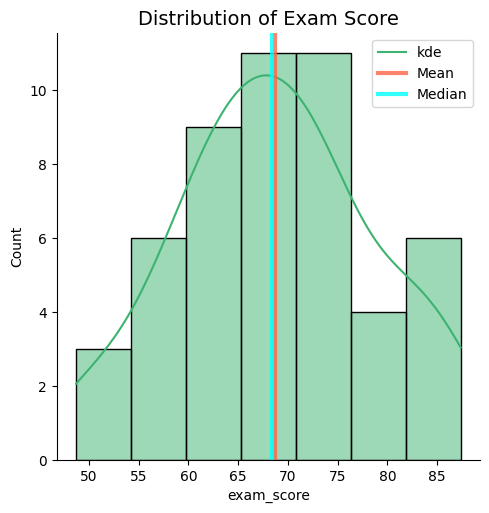

Skew: 0.01
Mean: 68.74, Median: 68.39
Standard Deviation: 9.75


In [10]:
sns.displot(task1["exam_score"], color = "mediumseagreen", kde = True)
plt.axvline(task1["exam_score"].mean(), linewidth = 3, color = 'tomato', label = "mean", alpha = 0.8)
plt.axvline(task1["exam_score"].median(), linewidth = 3, color = 'cyan', label = "median", alpha = 0.8)
plt.title("Distribution of Exam Score", size = 14)
plt.legend(["kde", "Mean", "Median"])
plt.show()

print('Skew:', round(task1['exam_score'].skew(), 2))
print('Mean: {:.2f}, Median: {:.2f}'.format(task1['exam_score'].mean(), task1['exam_score'].median()))
print('Standard Deviation: {:.2f}'.format(task1['exam_score'].std()))

Distribution of `Exam Score`: The distribution is "`considered a normal distribution`" and is symmetric data due to the values Mean/Median being practically the same values and being in the centre of the graph.

Statistical Values: Skew: **0.01**, Mean: **68.74**, Median: **68.39** and Standard Deviation: **9.75**. 

Next, getting a `boxplot` to see the distribution of quantitative, where this plot is possible to see the quartiles, and when it shows points means the existence of outliers, in this case, the distribution seems well distributed and there are no signals of outliers.

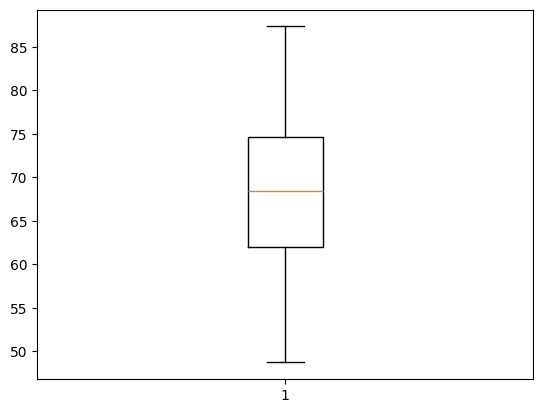

In [11]:
plt.boxplot(task1["exam_score"])
plt.show()

Next, getting a different plot using the `violinplot` to see the distribution from another perspective of view using a kernel density. 

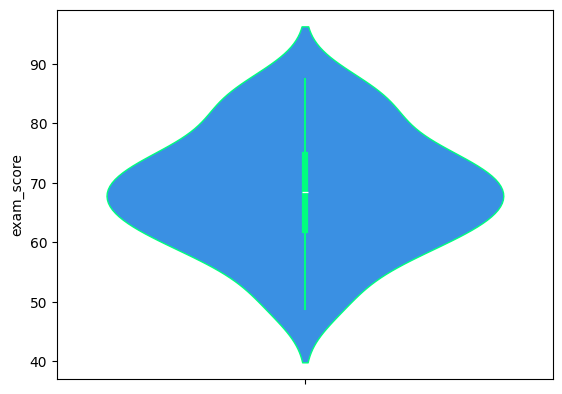

In [12]:
sns.violinplot(y = task1["exam_score"], linewidth = 1, linecolor = "springgreen", color = "dodgerblue")
plt.show()

Next, plotting a `Histplot` to see the distribution in a Histogram separately.

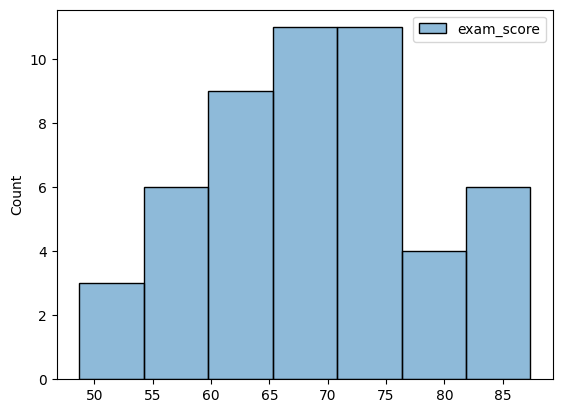

In [13]:
sns.histplot(task1)
plt.show()

Next, using a `kdeplot` to see the kernel of density estimate of the `Exam Score` using the parameter bw_adjust in .2 and next 5. 

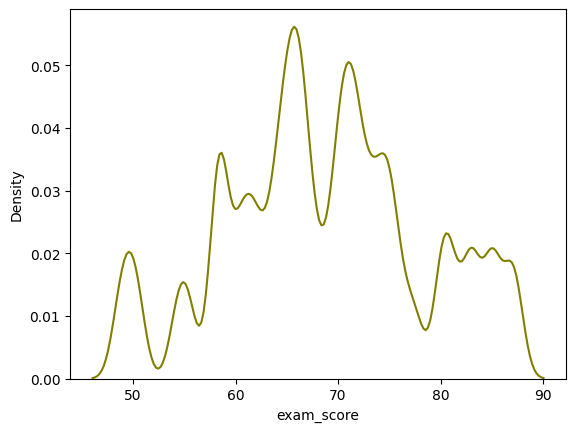

In [14]:
sns.kdeplot(data = task1, x = "exam_score", bw_adjust = .2, color = "olive");

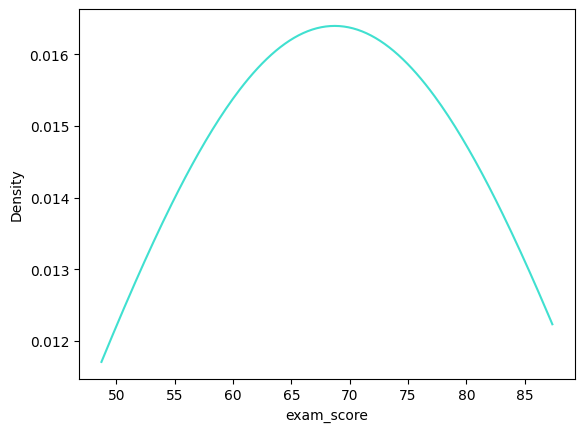

In [15]:
ax = sns.kdeplot(data = task1, x = "exam_score", bw_adjust = 5, cut = 0, color = "turquoise")

Next, using `kdeplot` to see the kernel of density estimate of the `Exam Score` more interpretable. 

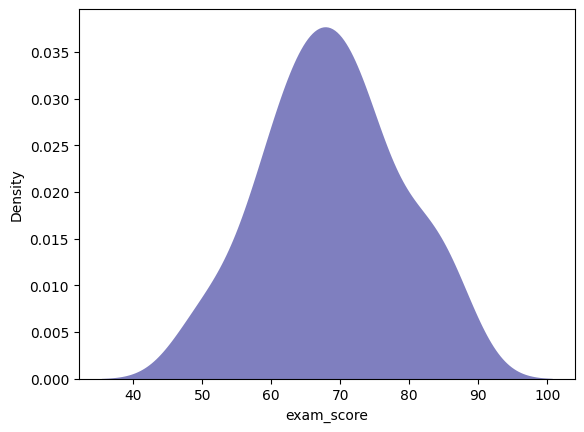

In [16]:
sns.kdeplot(
   data = task1, x = "exam_score", fill = True, common_norm = False, palette="crest",
   alpha = .5, linewidth = 0, color = "navy",
); 

### Task 1.2 - Step (b) Teachers Concernes

b. One of the teachers is concerned about the performance of the students in the school. She suspects that their performance may be below the reported national average of 70%. Does the data show that her concerns are justified? Use a significance level of alpha = 0.05.

1. State the null ($H_0$) and alternative ($H_1$) hypothesis.
2. Find the critical Value.
3. Calculate the test statistics.

In [21]:
print("xbar - Sample (Mean):", np.mean(task1["exam_score"]))
print("mu - Population:", 70)
print("s - Standard Deviation:", statistics.stdev(task1["exam_score"]))
print("n - Length (Sample Size):", len(task1["exam_score"]))

xbar - Sample (Mean): 68.73559999999999
mu - Population: 70
s - Standard Deviation: 9.75014288958613
n - Length (Sample Size): 50


- Sample (Mean): **68.74**
- Population: **70**
- Standard Deviation: **9.76**
- Sample Size: **50**

Next, using "`scipy.stats.ttest_1samp`" to "Calculate the T-test for the mean of ONE group of scores." (The SciPy community, 2024)

In [24]:
stats.ttest_1samp(task1["exam_score"], popmean = 70)

TtestResult(statistic=-0.9169771399834613, pvalue=0.36364597032062806, df=49)

The p-value = **0.36**

In [25]:
print(" The p-value =", stats.ttest_1samp(task1["exam_score"], popmean = 70)[1])

 The p-value = 0.36364597032062806


Getting the perform calculation manually with the code below:   

In [33]:
import math

xbar = task1["exam_score"].mean()
mu = 70
s = statistics.stdev(task1["exam_score"]) 
n = len(task1["exam_score"])

print("The Test Statistic:", (xbar - mu) / (s / math.sqrt(n)))

The Test Statistic: -0.9169771399834615


If the p-value is $<$ $\alpha$, we reject the $H_0$, if the p-value is $\nless$ $\alpha$ then we fail to reject $H_0$

In [36]:
pvalue = stats.ttest_1samp(task1["exam_score"], popmean = 70)[1]
alpha = 0.05 
pvalue <= alpha

False

**pvalue 0.36** <= **alpha 0.05** = False

pvalue is greater than alpha, so we fail to reject the $H_0$ hypothesis. 

4. Make a decision based on the data.

Since the p-value is $\nless$ $\alpha$ we failt to reject the $H_0$

5. Summmerise the result

Give the observation and with a significance level of $\alpha$ = 0.05 we do not have sufficient evidence to reject the $H_0$


### Task 1.3 - Step (3) Findings

c. Produce and comment on an appropriate plot to illustrate your findings.

Plotting the means of the sample and population. 

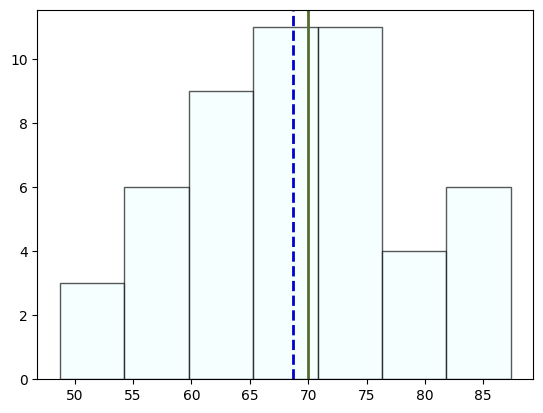

In [54]:
result = plt.hist(task1["exam_score"], bins = 7, color = "azure", edgecolor = "k", alpha = 0.65)

plt.axvline(task1["exam_score"].mean(), color = "mediumblue", linestyle = "dashed", linewidth = 2)
plt.axvline(mu, color = "darkolivegreen", linestyle = "solid", linewidth = 2);

**One Tailed Test** 

In order to perform the one-tailed test we adjust the alternative hypothesis 

In this case: $H_A: \mu > 70$. 

This means that this is a right tailed test. 

In [56]:
stats.ttest_1samp(task1["exam_score"], popmean = 70, alternative = "greater")

TtestResult(statistic=-0.9169771399834613, pvalue=0.818177014839686, df=49)

### Task 1.4 - Hypothesis exploring the data

Creating a new feature named "`performance`" to get just the students from a Dublin secondary school that got more than 70 per cent in the exam scores, and getting the head of the data.

In [60]:
task1["performance"] = task1["exam_score"].apply(lambda x: 1 if x >= 70 else 0)
task1.head()

,exam_score,performance
0,74.54,1
1,66.20,0
2,86.75,1
3,70.87,1
4,80.43,1


Using the command "`value_counts()`" to see the number of students up and down to 70%, in this case, 26 students did not get equal or more than 70% in the grades and 24 students got it and next plotting using a `barplot`. 

In [61]:
task1["performance"].value_counts()

performance
0    26
1    24
Name: count, dtype: int64

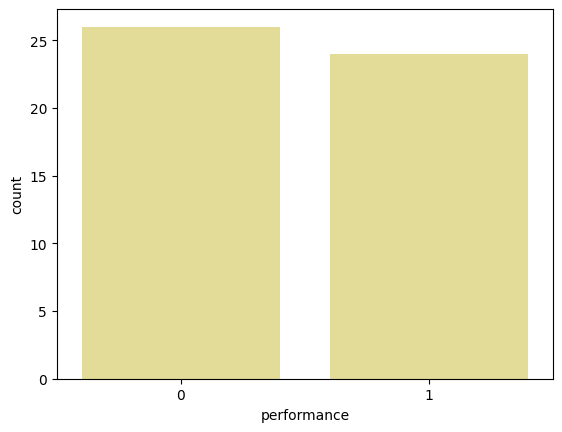

In [79]:
sns.barplot(task1["performance"].value_counts(), color = "khaki");

Next, getting the percentage from the total student performance, in this case, 26 or 52% of the students did not get equal or more than 70% in the grades and 24 or 48% of the students got it, and next plotting using a `pie`.

In [83]:
task1["performance"].value_counts() / len(task1["performance"])

performance
0    0.52
1    0.48
Name: count, dtype: float64

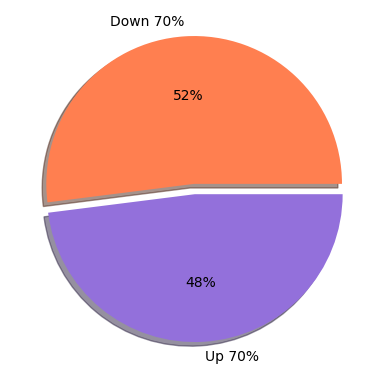

In [84]:
valuesPerfomance = task1['performance'].value_counts()

labels = ['Down 70%', 'Up 70%']
explode = [0.07, 0]
colors = ["coral", "mediumpurple"]

plt.pie(valuesPerfomance, labels = labels, explode = explode, colors = colors, shadow = True, autopct='%.0f%%')
plt.show()

In [87]:
print("Total sum of", valuesPerfomance, "\n")
print("Percentage of Down 70%: ", valuesPerfomance[0] / len(task1["performance"]))
print("Percentage of Up 70%: ", valuesPerfomance[1] / len(task1["performance"]))

Total sum of performance
0    26
1    24
Name: count, dtype: int64 

Percentage of Down 70%:  0.52
Percentage of Up 70%:  0.48


Next, creating a new feature named "`classification`" to add a classification of the grades got, and getting the head of the data.

**Get a Classification and Grade Band and Standard:** 
1. 0 – 34% Unsatisfactory (Fail)
2. 35 – 39% Limited (Fail (pass by compensation, where applicable))
3. 40 – 49% Acceptable (Pass)
4. 50 – 59% Good (Lower Second Class Honours or Merit One)
5. 60 – 69% Very Good (Upper Second Class Honours or Merit Two)
6. 70 – 79% Excellent (First Class Honours or Distinction)
7. 80 – 89% Outstanding (First Class Honours or Distinction)
8. 90 – 100% Exceptional (First Class Honours or Distinction)

After reading "Using If-Else Statements in Pandas: A Practical Guide [+ Examples]" (Stephen Roddewig, 2022) from blog.hubspot.com and "if…elif…else in Python Tutorial" (Hugo Bowne-Anderson, 2022) from datacamp.com it was possible to use properly the commands if, elif and else. 

In [88]:
classifications = []

for score in task1["exam_score"]:
    if score >= 0 and score <= 34.99:
        classification = "Unsatisfactory"
    elif score >= 35 and score <= 39.99:
        classification =  "Limited"
    elif score >= 40 and score <= 49.99:
        classification =  "Acceptable"
    elif score >= 50 and score <= 59.99:
        classification =  "Good"
    elif score >= 60 and score <= 69.99:
        classification =  "Very Good"
    elif score >= 70 and score <= 79.99:
        classification =  "Excellent"
    elif score >= 80 and score <= 89.99:
        classification =  "Outstanding"
    elif score >= 90 and score <= 100:
        classification =  "Exceptional"
    else:
        classification =  "Invalid Score"
        
    classifications.append(classification)

In [89]:
task1["classification"] = classifications

In [90]:
task1.head()

,exam_score,performance,classification
0,74.54,1,Excellent
1,66.20,0,Very Good
2,86.75,1,Outstanding
3,70.87,1,Excellent
4,80.43,1,Outstanding


Next, creating a new feature named "`grade_band_standard`" to add a Grade Band and Standard of the grades got, and getting the head of the data.

**Get a Classification and Grade Band and Standard:**

1. 0 – 34% Unsatisfactory (Fail)
2. 35 – 39% Limited (Fail (pass by compensation, where applicable))
3. 40 – 49% Acceptable (Pass)
4. 50 – 59% Good (Lower Second Class Honours or Merit One)
5. 60 – 69% Very Good (Upper Second Class Honours or Merit Two)
6. 70 – 79% Excellent (First Class Honours or Distinction)
7. 80 – 89% Outstanding (First Class Honours or Distinction)
8. 90 – 100% Exceptional (First Class Honours or Distinction)

In [91]:
GradeBandStandard = []

for score in task1["exam_score"]:
    if score >= 0 and score <= 34.99:
        standard = "Fail"
    elif score >= 35 and score <= 39.99:
        standard =  "Fail (pass by compensation, where applicable)"
    elif score >= 40 and score <= 49.99:
        standard =  "Pass"
    elif score >= 50 and score <= 59.99:
        standard =  "Lower Second Class Honours or Merit One"
    elif score >= 60 and score <= 69.99:
        standard =  "Upper Second Class Honours or Merit Two"
    elif score >= 70 and score <= 100:
        standard =  "First Class Honours or Distinction"
    else:
        standard =  "Invalid"
        
    GradeBandStandard.append(standard)

In [92]:
task1["grade_band_standard"] = GradeBandStandard

In [93]:
task1.head(5)

,exam_score,performance,classification,grade_band_standard
0,74.54,1,Excellent,First Class Honours or Distinction
1,66.20,0,Very Good,Upper Second Class Honours or Merit Two
2,86.75,1,Outstanding,First Class Honours or Distinction
3,70.87,1,Excellent,First Class Honours or Distinction
4,80.43,1,Outstanding,First Class Honours or Distinction


Gettin the "`.value_counts()`" of the new feature "`classification`" to see how are the division of Classification and Grade Band and Standard between the students, in this case: Very Good 17 students, Excellent 15 students, Outstanding 9 students, Good 7 students and Acceptable 2 students. 

In [99]:
task1["classification"].value_counts()

classification
Very Good      17
Excellent      15
Outstanding     9
Good            7
Acceptable      2
Name: count, dtype: int64

After reading "Step-by-Step Exploratory Data Analysis (EDA) using Python" (Mahadevan, 2022) in "Step 9: EDA Univariate Analysis" from analyticsvidhya.com learned a new way to plot a "`barplot`" using "`countplot`".

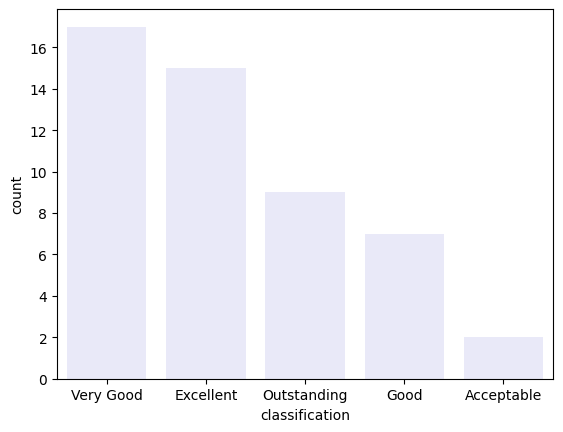

In [100]:
sns.countplot(x = 'classification', data = task1, color = 'lavender', order = task1['classification'].value_counts().index);
# sns.barplot(task1["classification"].value_counts(), color = "khaki");

Also, used a "`countplot`" of "`classification`" using as a hue of the "`performance`" of students to understand we are distributing the students up and down of 70% grade. 

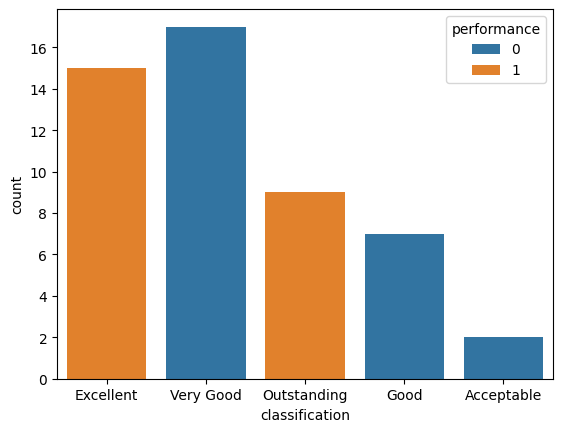

In [102]:
sns.countplot(task1, x = "classification", hue = "performance");

Next, doing the same from the "`grade_band_standard`". 
First Class Honours or Distinction 24 students, Upper Second Class Honours or Merit Two 17 students, Lower Second Class Honours or Merit One 7 students and Pass 2 students.

In [103]:
task1["grade_band_standard"].value_counts()

grade_band_standard
First Class Honours or Distinction         24
Upper Second Class Honours or Merit Two    17
Lower Second Class Honours or Merit One     7
Pass                                        2
Name: count, dtype: int64

Learned "How to Rotate Axis Labels in Seaborn Plots" (Zach, 2022) from www.statology.org. 

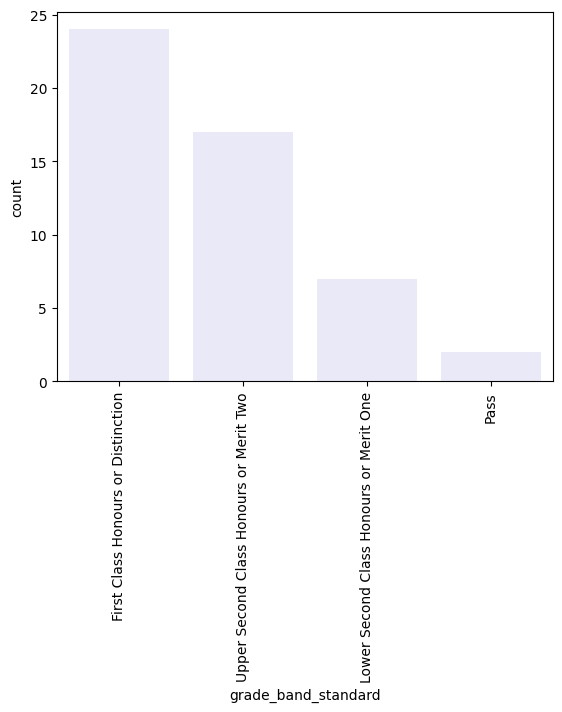

In [105]:
my_plot = sns.countplot(x = 'grade_band_standard', data = task1, color = 'lavender', order = task1['grade_band_standard'].value_counts().index);
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation = 90);

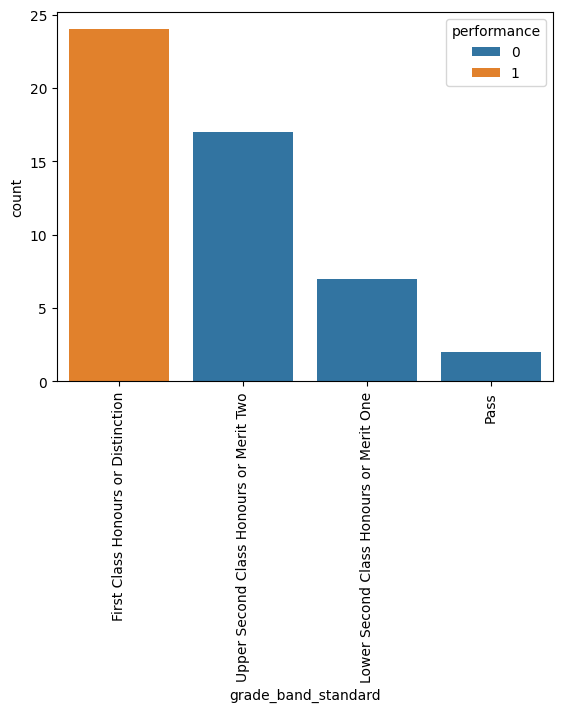

In [107]:
my_plot = sns.countplot(task1, x = "grade_band_standard", hue = "performance");
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation = 90);

Next, importing "`LabelEncoder`" and encoding the classification features "`classification and grade_band_standard`" to numerics and getting the `Head` of the data.

In [111]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
task1['classification'] = encoder.fit_transform(task1['classification'])

encoder = LabelEncoder()
task1['grade_band_standard'] = encoder.fit_transform(task1['grade_band_standard'])

In [112]:
task1.head(5)

,exam_score,performance,classification,grade_band_standard
0,74.54,1,1,0
1,66.20,0,4,3
2,86.75,1,3,0
3,70.87,1,1,0
4,80.43,1,3,0


Next using a "`heatmap`" to see the correlation between the features. 

,exam_score,performance,classification,grade_band_standard
exam_score,1.000000,0.811684,0.015990,-0.573747
performance,0.811684,1.000000,-0.527235,-0.882508
classification,0.015990,-0.527235,1.000000,0.715445
grade_band_standard,-0.573747,-0.882508,0.715445,1.000000


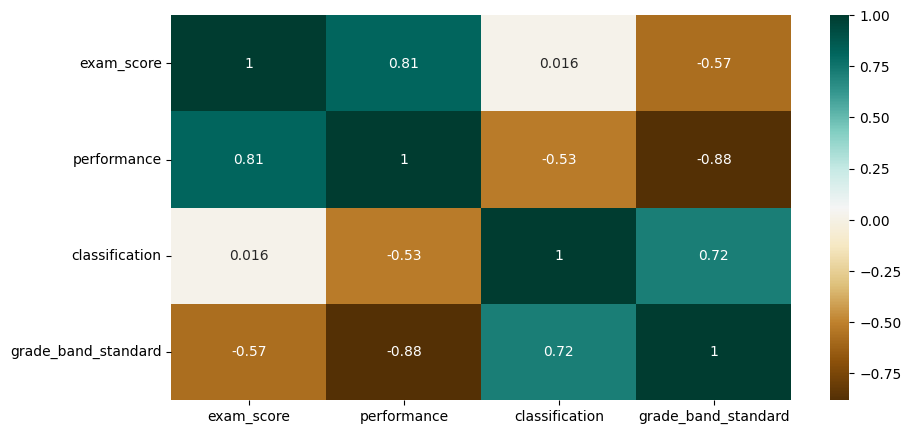

In [116]:
numeric_cols = task1.select_dtypes(include = ['number'])

plt.figure(figsize = (10, 5))
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, cmap = "BrBG", annot = True)
correlation_matrix

Next, was created a comparison using "`distplot`" and "`kdeplot`" graphics in a "`for loop`", to check the distribution of all numerical features, also getting statistic values such as `Skew, Mean, Median and Standard Deviation`.

exam_score
Skew: 0.01
Mean: 68.74, Median: 68.39
Standard Deviation: 9.75


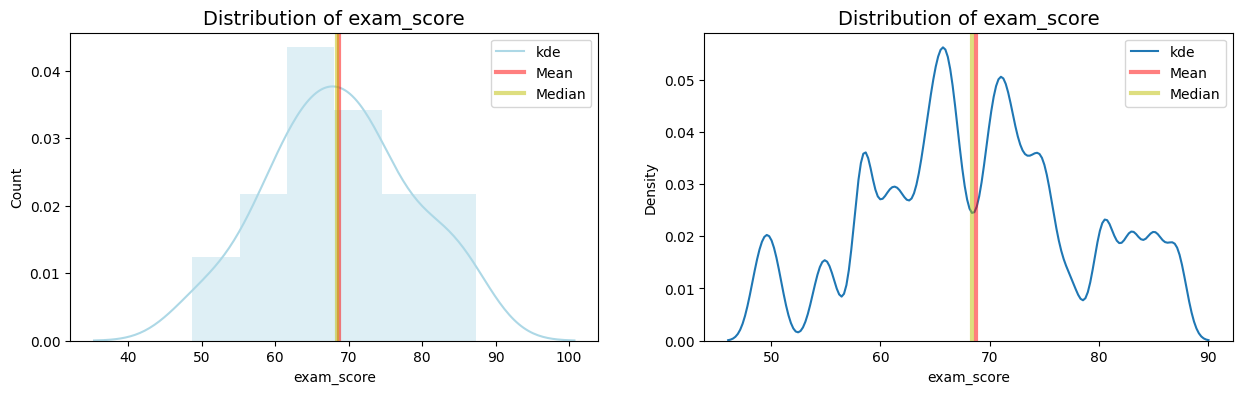

performance
Skew: 0.08
Mean: 0.48, Median: 0.00
Standard Deviation: 0.50


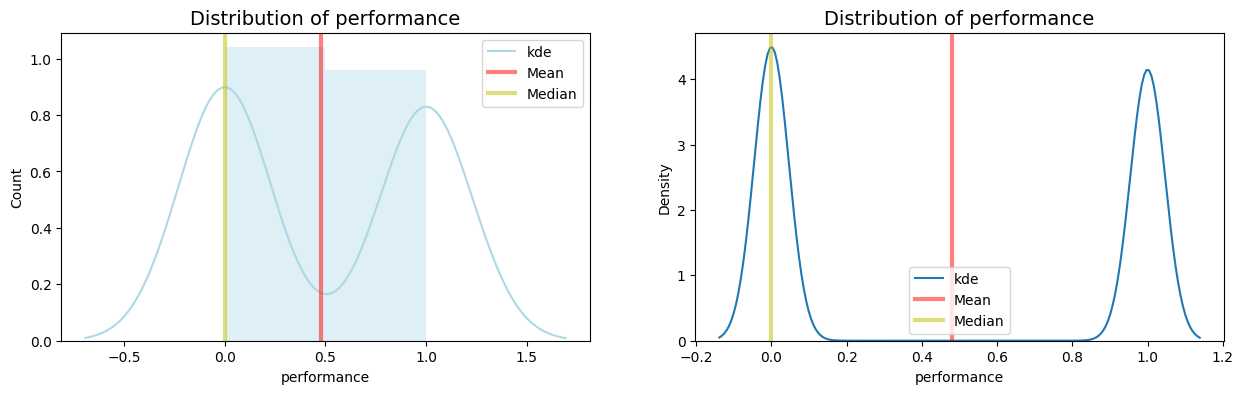

classification
Skew: -0.17
Mean: 2.48, Median: 3.00
Standard Deviation: 1.34


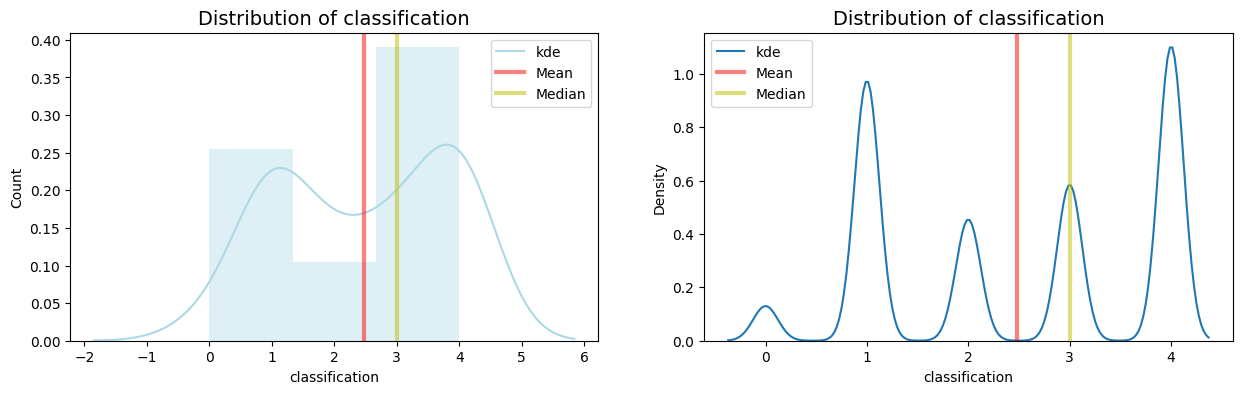

grade_band_standard
Skew: 0.4
Mean: 1.24, Median: 1.00
Standard Deviation: 1.36


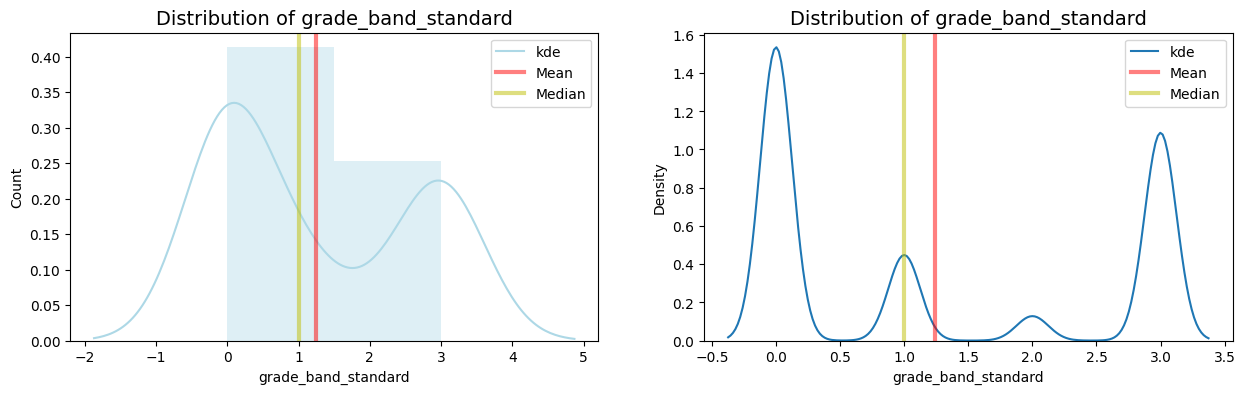

In [117]:
feature_name = task1[['exam_score', 'performance', 'classification', 'grade_band_standard']]

for col in feature_name:
    print(col)
    print('Skew:', round(task1[col].skew(), 2))
    print('Mean: {:.2f}, Median: {:.2f}'.format(task1[col].mean(), task1[col].median()))
    print('Standard Deviation: {:.2f}'.format(task1[col].std()))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(task1[col], axlabel = col, color = "lightblue");
    plt.axvline(task1[col].mean(), linewidth = 3, color = 'r', label = "mean", alpha = 0.5)
    plt.axvline(task1[col].median(), linewidth = 3, color = 'y', label = "median", alpha = 0.5)
    plt.title("Distribution of " + col, size = 14)
    plt.legend(["kde", "Mean", "Median"])
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.kdeplot(data = task1, x = col, bw_adjust = .2)
    plt.axvline(task1[col].mean(), linewidth = 3, color = 'r', label = "mean", alpha = 0.5)
    plt.axvline(task1[col].median(), linewidth = 3, color = 'y', label = "median", alpha = 0.5)
    plt.title("Distribution of " + col, size = 14)
    plt.legend(["kde", "Mean", "Median"])
    plt.show()

Next, using a "`pairplot`" to visualise all the features and their respective signals and distributions. 

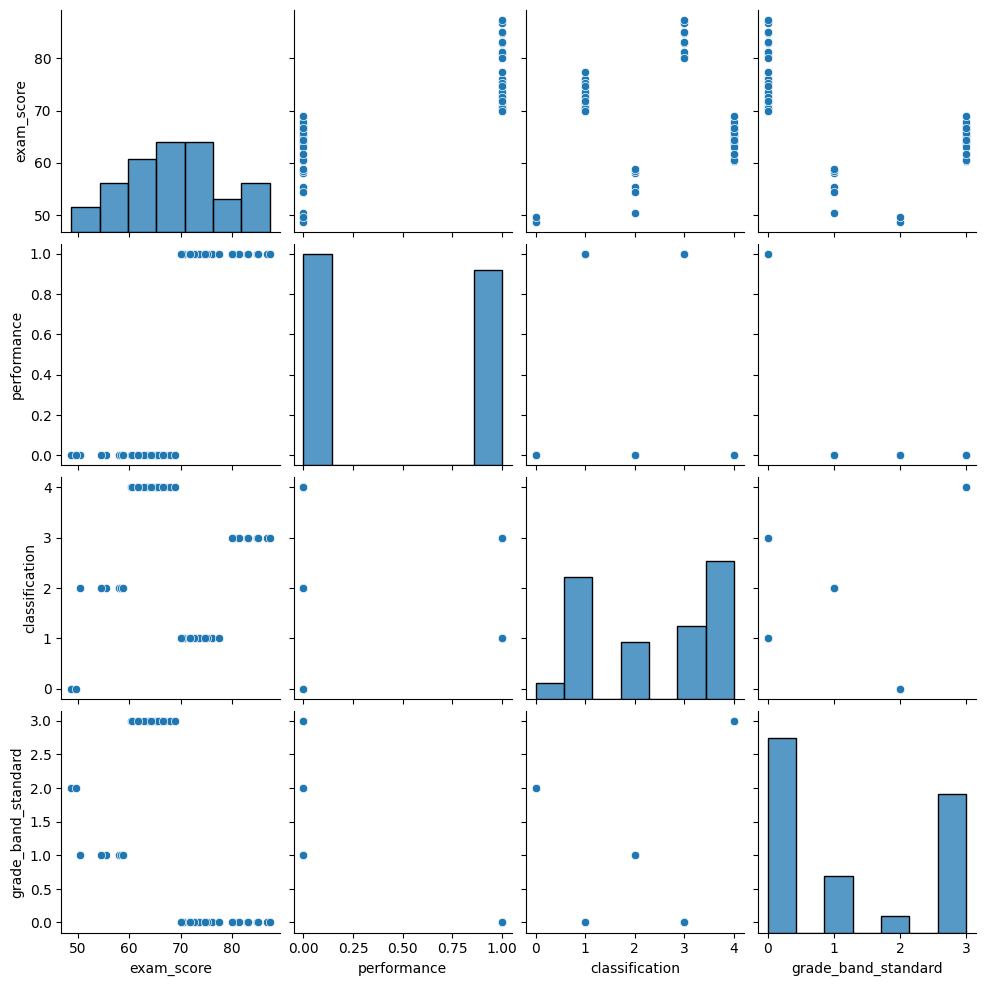

In [115]:
sns.pairplot(task1.select_dtypes(include = ['number']));

#### Task 1.4.1 - Hypothesis exploring the data with Machine Learning

In [121]:
from sklearn.model_selection import train_test_split  

X = task1.drop("performance", axis = 1).copy()
y = task1["performance"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

In [123]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 43)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [124]:
from sklearn import metrics 

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [125]:
X.columns.tolist()

['exam_score', 'classification', 'grade_band_standard']

In [126]:
task1["performance"].unique().tolist()

[1, 0]

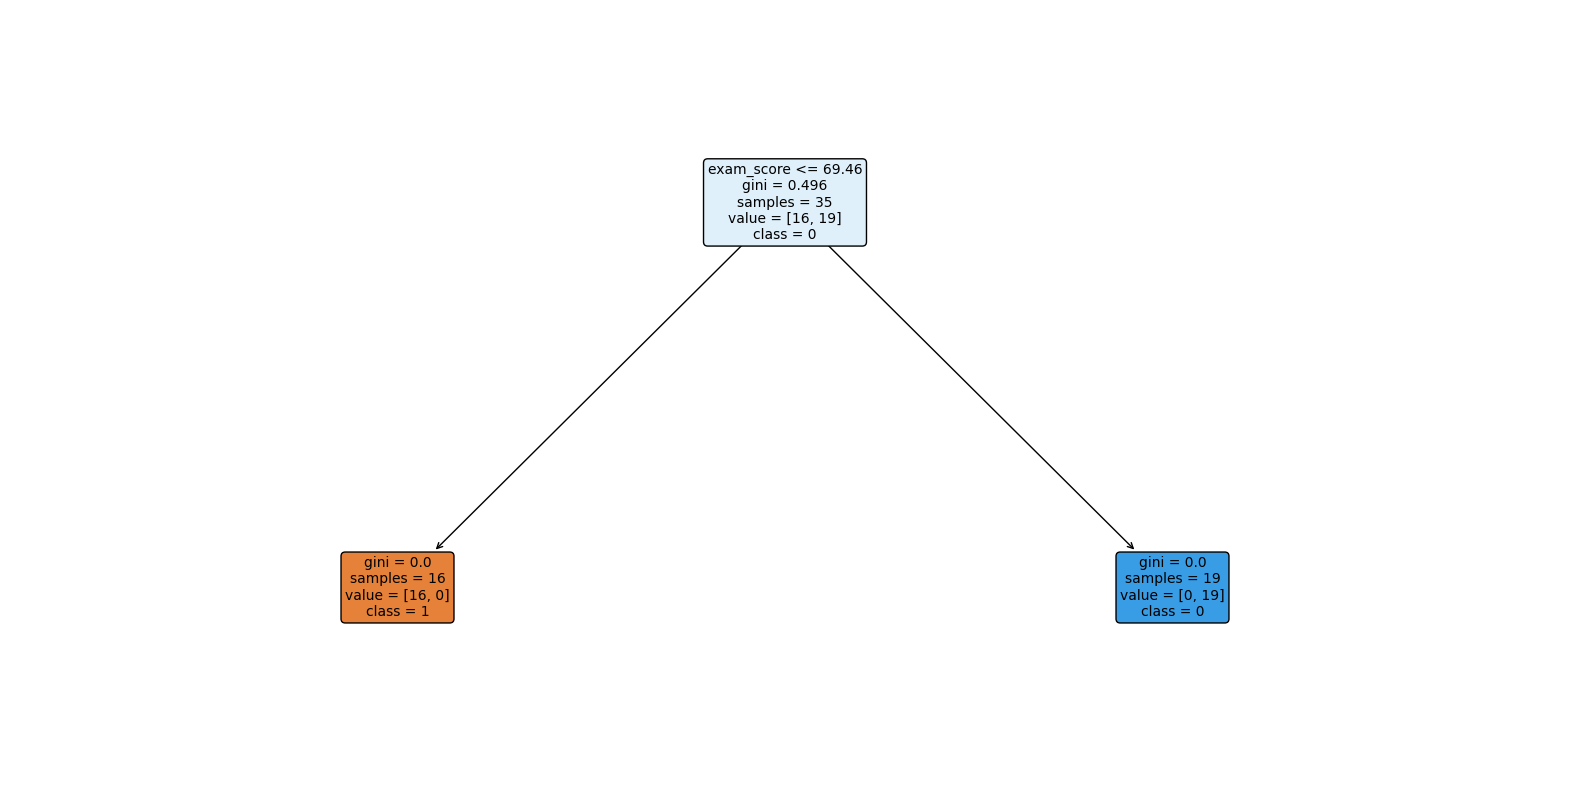

In [128]:
from sklearn.tree import plot_tree 

plt.figure(figsize = (20, 10))
plot_tree(clf, filled = True, feature_names = X.columns.tolist(), class_names = [str(label) for label in task1["performance"].unique()], rounded = True, fontsize = 10)
plt.show()

In [129]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, random_state = 43)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [134]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f} \n")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Confusion Matrix:
 [[10  0]
 [ 0  5]]

Accuracy: 1.00 



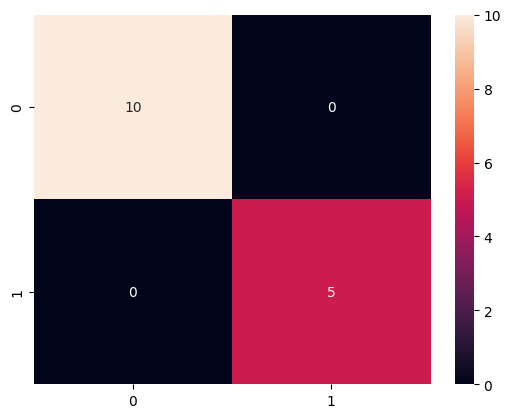

In [135]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot = True, fmt = 'd');

---

## Task 2

2. Load the diamonds dataset, and print the first 5 rows. The color variable refers to the colour of the diamond, with categories from “D” to “J”. Colourless diamonds are considered better than diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).

- a. Create a new binary variable in the dataframe called “colourless” which records 1 in rows with colourless diamonds and 0 otherwise.
- b. Perform an appropriate hypothesis test to determine whether there is any association between the clarity of a diamond and whether it is colourless or not. Use a significance level of alpha = 0.01.
- c. Produce and comment on an appropriate plot to illustrate your findings.
- d. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds and the mean price of non-colourless diamonds.

### Task 2 - Loading Diamonds dataset 

2. Load the diamonds dataset, and print the first 5 rows. The color variable refers to the colour of the diamond, with categories from “D” to “J”. Colourless diamonds are considered better than diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).

Creating a Data Frame named "`task2`" after loading the data set "`diamonds.csv`" using the command "`.read_csv()`" and getting the first 5 rows using the command "`.head()`". 

In [138]:
task2 = pd.read_csv("diamonds.csv")

In [139]:
task2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Getting the shape of the `task2` data frame, in this case **53940** observations and **10** features, also using the unique command to understand better the values from the "color" feature. 

In [143]:
task2.shape

(53940, 11)

In [140]:
task2["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

### Task 2.1 - Step (a) New Binary Variable "colourless"

a. Create a new binary variable in the dataframe called “colourless” which records 1 in rows with colourless diamonds and 0 otherwise.

Diamonds colors variable from "`D`" to "`F`". 
- "D" to "F" are considered colourless;
- “G” to “J” are not considered colourless.

Creating a new feature named "`colourless`" to record 1 in rows with colourless diamonds "D" to "F" are considered colourless and 0 otherwise, “G” to “J” are not considered colourless, and getting the head of the data.

In [141]:
task2["colourless"] = [1 if colors == 'D' or colors == 'E' or colors == 'F' else 0 for colors in task2['color']]

In [142]:
task2[task2["colourless"] == 1].head()

,carat,cut,color,clarity,depth,table,price,x,y,z,colourless
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,1


### Task 2.1 - Step (b) Hypothesis test

b. Perform an appropriate hypothesis test to determine whether there is any association
between the clarity of a diamond and whether it is colourless or not. Use a significance
level of alpha = 0.01.

https://medium.com/@ibezimchike/using-contingency-tables-to-find-associations-between-categorical-variables-in-python-2a2a4f14082d

In [ ]:
commuter_freq = pd.crosstab(task2.clarity, task2.color)

print(commuter_freq)

In [ ]:
task2.apply(lambda x : pd.factorize(x)[0]).corr(method = 'pearson', min_periods = 1)

In [ ]:
task2.columns

https://mlexplained.blog/2023/01/23/how-to-calculate-correlation-among-categorical-variables/

In [ ]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(index = task2['clarity'], columns = task2['color'])
print(cross_tab)

In [ ]:
chi_sq_result = chi2_contingency(cross_tab,)

p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.01 else "accept"
 
print(f"The p-value is {chi_sq_result[1]} and hence we {x} the null Hpothesis with {chi_sq_result[2]} degrees of freedom")

In [ ]:
task2.head()

In [ ]:
df = sns.load_dataset('titanic')
corr = task2[['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'colourless']].corr()
 
mask = np.triu(np.ones_like(corr, dtype=bool))
 
f, ax = plt.subplots(figsize=(11, 9))
 
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(index = task2['clarity'], columns = task2['colourless'])
print(cross_tab)

In [ ]:
chi_sq_result = chi2_contingency(cross_tab,)

p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.01 else "accept"
 
print(f"The p-value is {chi_sq_result[1]} and hence we {x} the null Hpothesis with {chi_sq_result[2]} degrees of freedom")

In [ ]:
encoder = LabelEncoder()
task2['clarity'] = encoder.fit_transform(task2['clarity'])

In [ ]:
res = stats.pearsonr(task2["clarity"], task2["colourless"])
res

In [ ]:
alpha = 0.01 

res[1] > alpha

In [ ]:
np.mean(task2['clarity'])

In [ ]:
task2_clarity_mean = np.mean(task2['clarity'])
print(np.mean(task2['clarity']))

print(np.mean(task2['colourless']))
task2_colourless_mean = np.mean(task2['colourless'])

In [ ]:
stats.ttest_ind(a = task2_clarity_mean, b = task2_colourless_mean, equal_var = False)

In [ ]:
stats.ttest_rel(task2_clarity_mean, task2_colourless_mean)

### Task 2.1 - Step (d) Confidence intervals

https://www.statology.org/confidence-intervals-python/

In [ ]:
tcolourless = task2[task2['colourless'] == 1]
fcolourless = task2[task2['colourless'] == 0]

In [ ]:
print("True Colourless Mean Price:", tcolourless["price"].mean(), "\nNon Colourless Mean Price:", fcolourless["price"].mean())

In [ ]:
import scipy.stats as st

st.t.interval(confidence = 0.90, df=len(tcolourless["price"])-1, loc=np.mean(tcolourless["price"]), scale=st.sem(tcolourless["price"]))

In [ ]:
st.t.interval(confidence = 0.90, df=len(fcolourless["price"])-1, loc=np.mean(fcolourless["price"]), scale=st.sem(fcolourless["price"]))

In [ ]:
numeric_cols = task2[["clarity", "colourless"]]

plt.figure(figsize = (10, 5))
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, cmap = "BrBG", annot = True)
correlation_matrix

In [ ]:
numeric_cols = task2.select_dtypes(include = ['number'])

plt.figure(figsize = (10, 5))
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, cmap = "BrBG", annot = True)
correlation_matrix

---

## Task 3

3. Load the PlantGrowth dataset from the pydataset library. It contains the results of a small study comparing the yields of plants obtained under a control and under two different treatment conditions.

- a. Find and comment on important summary statistics by treatment and produce an appropriate plot to summarise the dataset.
- b. Conduct an appropriate hypothesis test to see if there is evidence of a difference between the three means (that is, the control and the two treatments). Use a significance level of alpha = 0.05.
- c. If there is evidence of a difference between the three means, find and comment on where this difference may be.

### Task 3 - Loading PlantGrowth dataset

3. Load the PlantGrowth dataset from the pydataset library. It contains the results of a small study comparing the yields of plants obtained under a control and under two different treatment conditions.

In [ ]:
# pip install pydataset

In [ ]:
from pydataset import data

In [ ]:
task3 = data('PlantGrowth')

In [ ]:
task3.head()

In [ ]:
task3['group'].unique()

In [ ]:
task3['group'].value_counts()

### Task 3.1 - Step (a) hypothesis test

In [ ]:
ctrl = task3[task3['group'] == 'ctrl']
trt1 = task3[task3['group'] == 'trt1']
trt2 = task3[task3['group'] == 'trt2']

In [ ]:
ctrl['group'].replace('ctrl', 0, inplace = True)
trt1['group'].replace('trt1', 1, inplace = True)
trt2['group'].replace('trt2', 2, inplace = True)

In [ ]:
stats.ttest_1samp(trt2["group"], popmean = len(task3['group']))

---

## Task 4
4. Load the trees dataset from the pydataset library. It contains measurements of the diameter, height and volume of timber in 31 felled black cherry trees. Note that the diameter (in inches) is labelled girth in the dataset. It is measured at 4 foot 6 inches above the ground.

- a. Perform a correlation analysis between all numerical variables. Include and comment on the results of hypothesis tests for the population correlation coefficients between all three pairs of variables (you can use the pearsonr function from the scipy.stats library).
- b. There is interest in estimating the volume of timber from trees using either the girth or the height of the trees, or both. Perform a regression analysis to decide which of the three possible models you would recommend using. Interpret your results and provide a short conclusion of your findings.

### Task 4 - Loading Trees dataset 

In [ ]:
from pydataset import data

In [ ]:
task4 = data('trees')

In [ ]:
task4.head()

In [ ]:
task4.plot();

### Task 4.1 - Step (a) 

In [ ]:
task4.columns

In [ ]:
res = stats.pearsonr(task4["Girth"], task4["Height"])
res

In [ ]:
res = stats.pearsonr(task4["Girth"], task4["Volume"])
res

In [ ]:
res = stats.pearsonr(task4["Height"], task4["Volume"])
res

### Task 4.1 - Step (b) 

In [ ]:
task4.head()

- Girth - 
- Height -
- Volume - 

In [ ]:
task4.plot(x = 'Girth', y = 'Height', style = '.')
plt.title('Girth vs Height')
plt.xlabel('Girth')
plt.ylabel('Height')
plt.show()

In [ ]:
task4.plot(x = 'Girth', y = 'Volume', style = '.')
plt.title('Girth vs Volume')
plt.xlabel('Girth')
plt.ylabel('Volume')
plt.show()

In [ ]:
task4.plot(x = 'Height', y = 'Volume', style = '.')
plt.title('Height vs Volume')
plt.xlabel('Height')
plt.ylabel('Volume')
plt.show()

In [ ]:
task4.head()

In [ ]:
# X = task4[["Girth"]].copy()
# y = task4[["Volume"]].copy()

X = task4.iloc[:, [0]]
y = task4.iloc[:, 2]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring = 'r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression().fit(X_train, y_train)

get_cv_scores(lr)

In [ ]:
print(lr.intercept_)
print(lr.coef_)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y, label = "Data Points")

plt.plot(X_test, y_pred, color = "red", label = "Linear Regression Line")

plt.xlabel("X")
plt.ylabel("y")

plt.title("Linear Regression")

plt.legend()

plt.show()

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import mglearn

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

In [ ]:
print("Test set predictions:\n", reg.predict(X_test))

In [ ]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Load the California housing dataset
housing = fetch_california_housing()

# Extract features (X) and target variable (y)
X = housing.data
y = housing.target

# Create a linear regression model
linear_model = LinearRegression()

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get R2 scores
cross_val_scores = cross_val_score(linear_model, X, y, cv=kf, scoring='r2')

# Print the R2 scores for each fold
for i, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {i}: R2 Score = {score}")

# Print the average R2 score across all folds
average_r2 = np.mean(cross_val_scores)
print(f"\nAverage R2 Score: {average_r2}")


---

### References

iamaziz (2015). PyDataset/examples/basic-usage.ipynb at master · iamaziz/PyDataset. [online] GitHub. Available at: https://github.com/iamaziz/PyDataset/blob/master/examples/basic-usage.ipynb [Accessed 1 May 2024].